In [1]:
# coativation_matrix
import bct

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
mat_path = r"C:\Users\ANEL\OneDrive\Escritorio\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat"

In [3]:
mat_json = scipy.io.loadmat(mat_path)

In [4]:
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dictmat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484581, -5.09251101],
        [-4.53874539, 46.53874539,  3.06273063]])}

In [5]:
mat_dict.keys()

dict_keys(['Coactivation_matrix', 'Coord'])

In [6]:
import pandas as pd
import numpy as np

coactmat = mat_dict['Coactivation_matrix']

# Crear un dataframe con la información del ndarray de coativation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas

df1 = pd.DataFrame(coactmat)
df1.index += 1
df1.columns = df1.index

# mostramos la información
df1.info(), df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 1 to 638
Columns: 638 entries, 1 to 638
dtypes: float64(638)
memory usage: 3.1 MB


(None,
         1         2         3         4         5    6         7         8    \
 1  0.000000  0.160714  0.111486  0.000000  0.138095  0.0  0.000000  0.000000   
 2  0.160714  0.000000  0.068259  0.000000  0.042056  0.0  0.000000  0.000000   
 3  0.111486  0.068259  0.000000  0.224199  0.000000  0.0  0.000000  0.052846   
 4  0.000000  0.000000  0.224199  0.000000  0.000000  0.0  0.039275  0.048035   
 5  0.138095  0.042056  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
 
    9         10   ...  629       630  631  632       633       634       635  \
 1  0.0  0.034351  ...  0.0  0.000000  0.0  0.0  0.157676  0.053872  0.049383   
 2  0.0  0.036585  ...  0.0  0.000000  0.0  0.0  0.119149  0.042105  0.000000   
 3  0.0  0.000000  ...  0.0  0.047035  0.0  0.0  0.000000  0.161905  0.103943   
 4  0.0  0.000000  ...  0.0  0.048673  0.0  0.0  0.000000  0.000000  0.075697   
 5  0.0  0.000000  ...  0.0  0.000000  0.0  0.0  0.066079  0.000000  0.000000   
 
         636     

Text(0.5, 1.0, 'Mapa de calor de Coactivation_matrix')

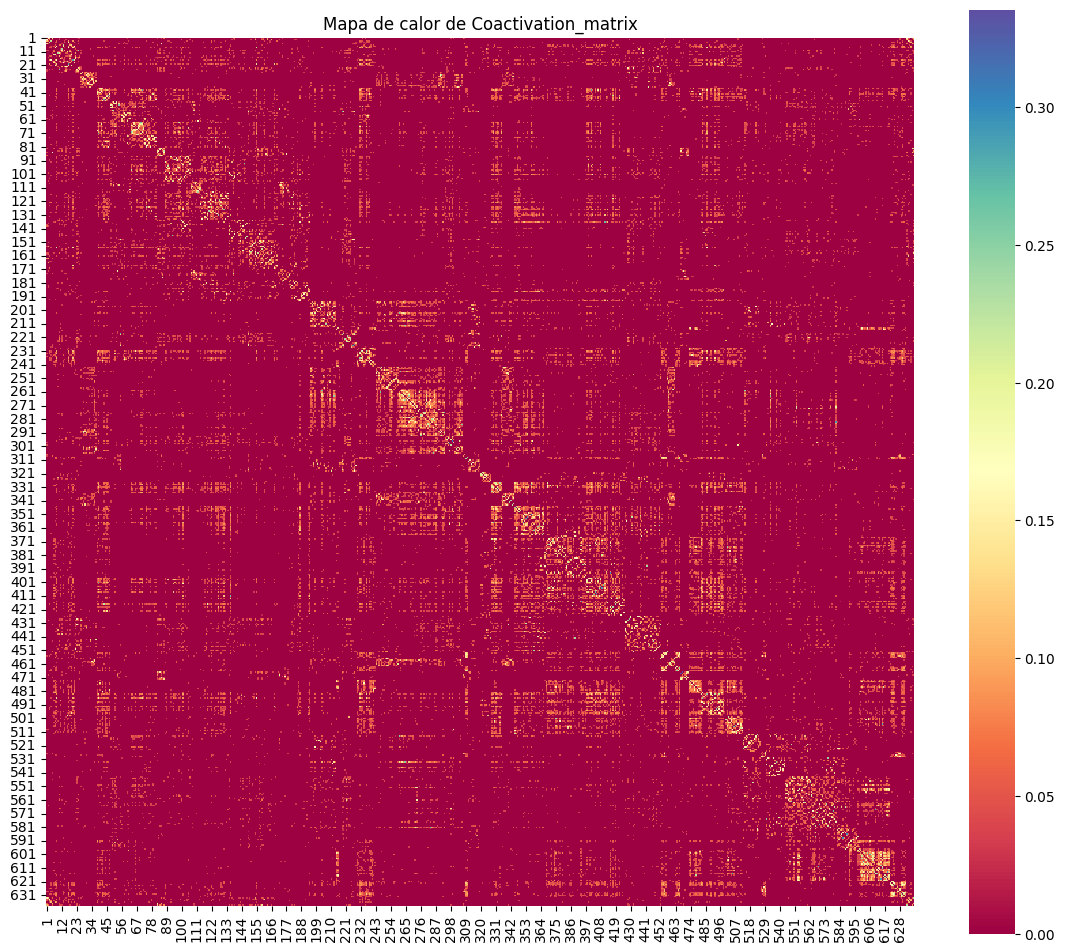

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Hacemos el mapa de calor

plt.figure(figsize=(14, 12))
sns.heatmap(df1, cmap = 'Spectral', square = True, cbar= True)
plt.title("Mapa de calor de Coactivation_matrix")

Text(0.5, 1.0, 'Mapa de calor del subconjunto de Coactivation_matrix')

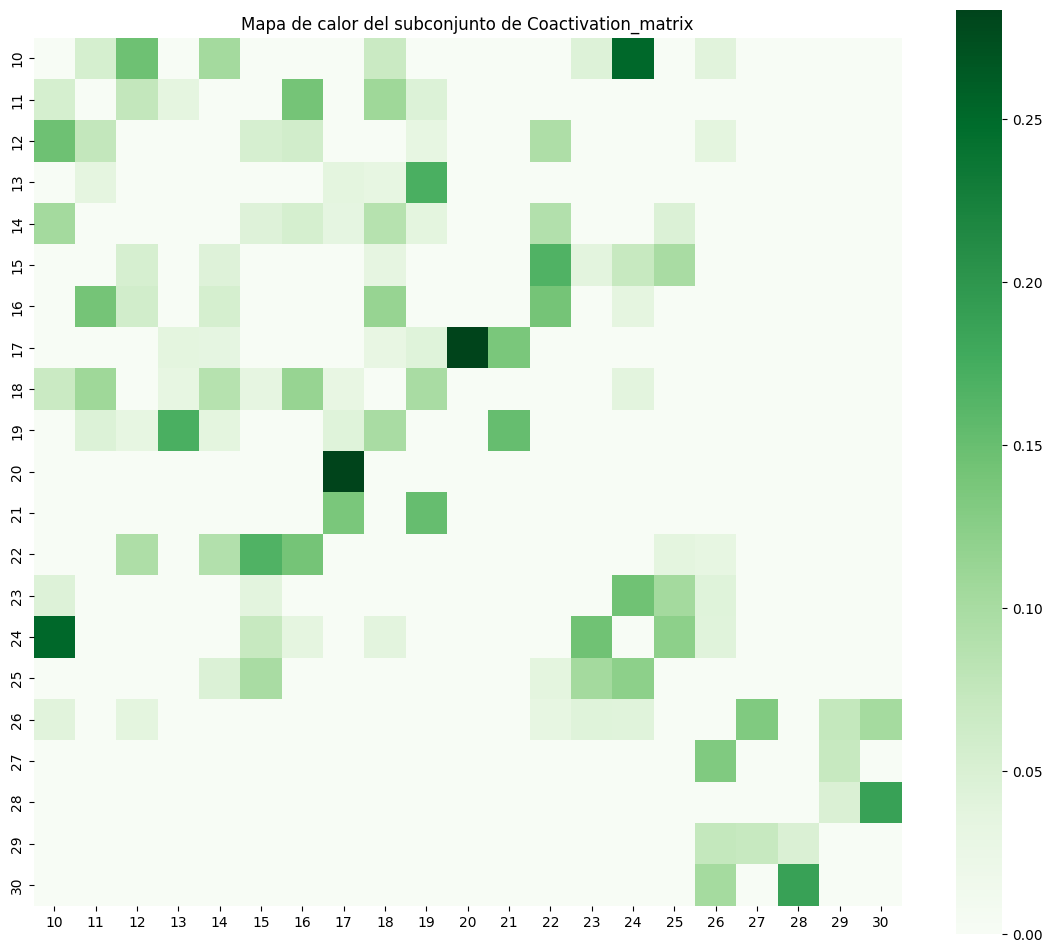

In [8]:
# creamos el subconjunto del dataframe que tiene filas y columnas desde la 10 hasta la 30

df2 = df1.loc[10:30, 10:30] # ya tenemos de la 10 hasta la 30 aquí, ahora va el mapa de calor

# mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(df2, cmap = 'Greens', square = True, cbar= True)
plt.title("Mapa de calor del subconjunto de Coactivation_matrix")

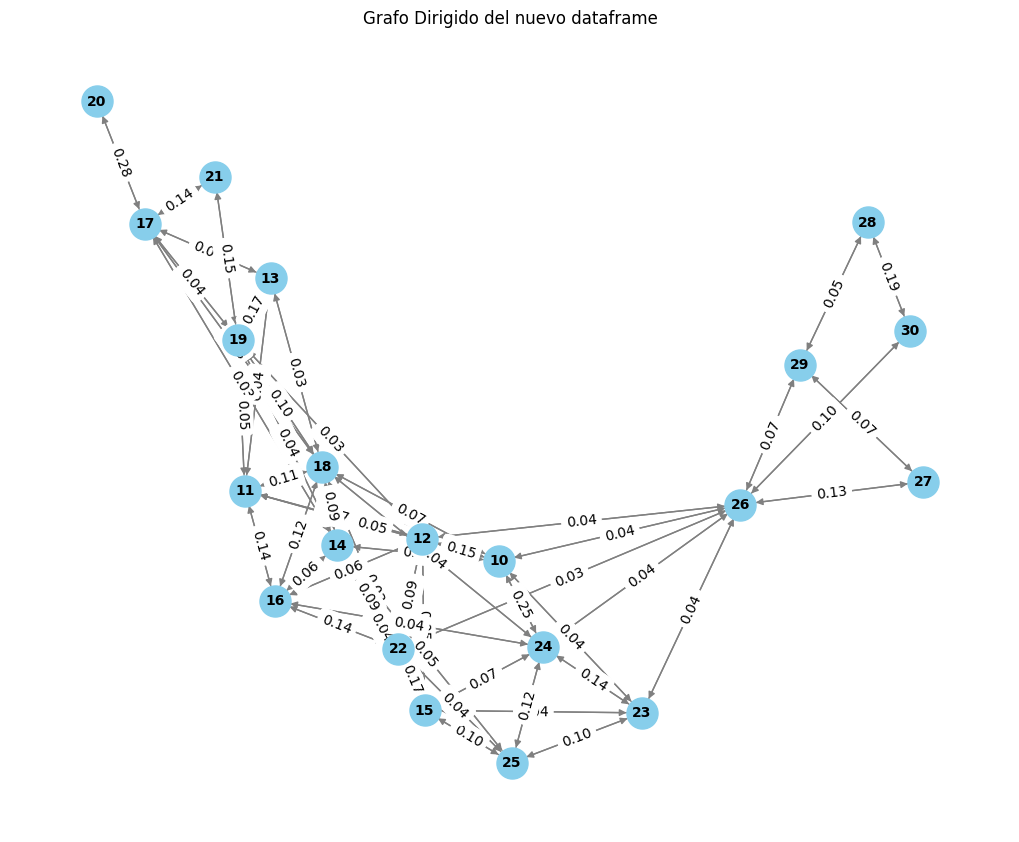

In [9]:
# Crear el grafo dirigido del nuevo dataframe
import networkx as nx
import matplotlib.pyplot as plt

edges = [(i, j, df2.loc[i, j]) for i in df2.index for j in df2.columns if df2.loc[i, j] > 0]

# Creamos el grafo dirigido
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Lo ploteamos
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout para una disposición visual adecuada
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{w:.2f}' for i, j, w in edges})
plt.title("Grafo Dirigido del nuevo dataframe")
plt.show()

In [10]:
# nodo con más conexiones

maxoutnod = max(G.out_degree(), key = lambda x: x[1]) # este es el nodo que saca más conexiones
maxinnod = max(G.in_degree(), key = lambda x: x[1]) # este es el nodo que recibe más conexiones

print("El nodo con más conexiones de entrada es: " , maxoutnod)
print("El nodo con más conexiones de salida es: " , maxinnod)

# es el mismo jejejjeje
# indica que es el nodo 18, con 9 conexiones

El nodo con más conexiones de entrada es:  (18, 9)
El nodo con más conexiones de salida es:  (18, 9)


In [11]:
# calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)

coactmat = mat_dict['Coactivation_matrix']
df3 = pd.DataFrame(coactmat)

# calcular los quantiles
quantiles = df3.stack().quantile([0.25, 0.5, 0.75])
print("Quantiles de la matriz: " , quantiles)

Quantiles de la matriz:  0.25    0.0
0.50    0.0
0.75    0.0
dtype: float64


In [12]:
# Filtre el dataframe usando como threshold los quantiles 0.25 y 0.5, cómo queda la matriz de activación filtrada?
import pandas as pd
import scipy.io as sio

q25 = df3.stack().quantile(0.25)
q5 = df3.stack().quantile(0.5)

# filtramos
filtro = df3[(df3 >= q25) & (df3 <= q5)]

print("Matriz filtrada con los quantiles 0.25 y 0.5: ")
print(filtro)

Matriz filtrada con los quantiles 0.25 y 0.5: 
     0    1    2    3    4    5    6    7    8    9    ...  628  629  630  \
0    0.0  NaN  NaN  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   
1    NaN  0.0  NaN  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   
2    NaN  NaN  0.0  NaN  0.0  0.0  0.0  NaN  0.0  0.0  ...  0.0  NaN  0.0   
3    0.0  0.0  NaN  0.0  0.0  0.0  NaN  NaN  0.0  0.0  ...  0.0  NaN  0.0   
4    NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
633  NaN  NaN  NaN  0.0  0.0  0.0  0.0  NaN  0.0  NaN  ...  0.0  NaN  0.0   
634  NaN  0.0  NaN  NaN  0.0  NaN  0.0  0.0  0.0  0.0  ...  0.0  NaN  0.0   
635  0.0  0.0  NaN  NaN  0.0  0.0  NaN  NaN  0.0  0.0  ...  0.0  NaN  0.0   
636  NaN  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   
637  NaN  NaN  0.0  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   

     631  632  633  634  635